In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

In [4]:
travel = pd.read_csv('/Users/knune/Documents/Data Analysis Projects/Travel Data.csv')

In [5]:
travel.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Cleaning the Data

### Dropping all of the null rows

In [6]:
travel = travel.dropna()
travel.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/16 17:15,1/6/16 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


### Creating day column

In [7]:
travel['START_DATE'] = pd.to_datetime(travel['START_DATE'])

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1469602131.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel['START_DATE'] = pd.to_datetime(travel['START_DATE'])


In [8]:
travel['END_DATE'] = pd.to_datetime(travel['END_DATE'])

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/4082842154.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel['END_DATE'] = pd.to_datetime(travel['END_DATE'])


In [9]:
travel['Day of Week'] = travel['START_DATE'].dt.day_name()
travel.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Day of Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday


In [10]:
travel.rename(columns = {'START_DATE': 'Start Date', 'END_DATE': 'End Date', 'CATEGORY': 'Category', 'START': 'Start City', 'STOP': 'Stop City', 'MILES': 'Miles', 'PURPOSE': 'Purpose'}, inplace=True)
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday


# Visualize total miles per month

### Create month column

In [11]:
travel['Month'] = travel['Start Date'].dt.month_name()
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,January


/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/2628775737.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'October'),
 Text(9, 0, 'November'),
 Text(10, 0, 'December')]

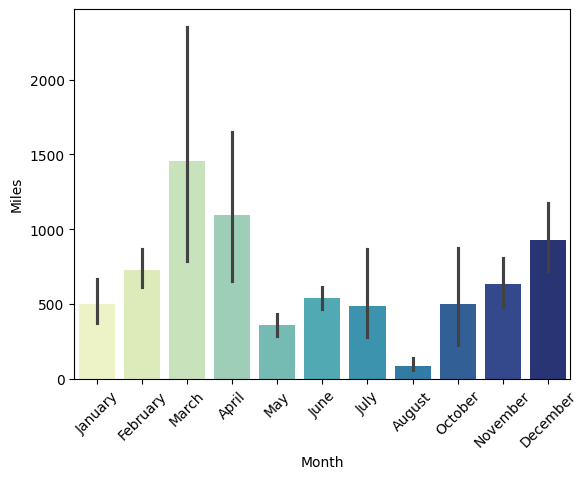

In [12]:
plot = sns.barplot(x='Month', y='Miles', data=travel, hue='Month', palette='YlGnBu', estimator = sum)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Visualize the average miles by purpose

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/3325939476.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x='Purpose', y='Miles', data=travel_meeting, hue='Purpose', palette='YlGnBu', ci=None)
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/3325939476.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


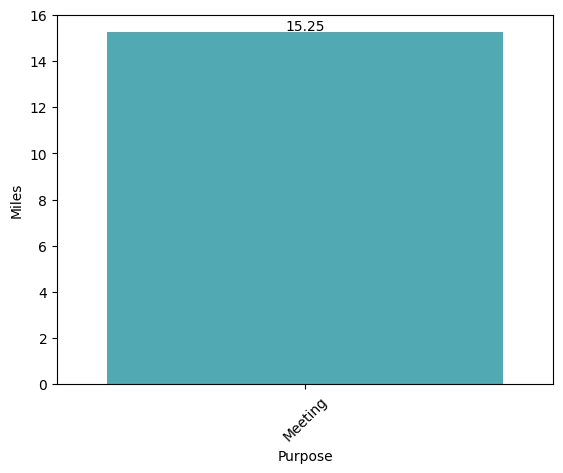

In [13]:
travel_meeting = travel.loc[(travel['Purpose'] == 'Meeting')]
plot = sns.barplot(x='Purpose', y='Miles', data=travel_meeting, hue='Purpose', palette='YlGnBu', ci=None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
i=0
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2., height + 0.1,
        round(height, 2),ha="center")
    i += 1

# Visualize the total rides per city

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1131197550.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=travel, x='Start City', palette = "YlGnBu")
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1131197550.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


Text(0.5, 0, 'City')

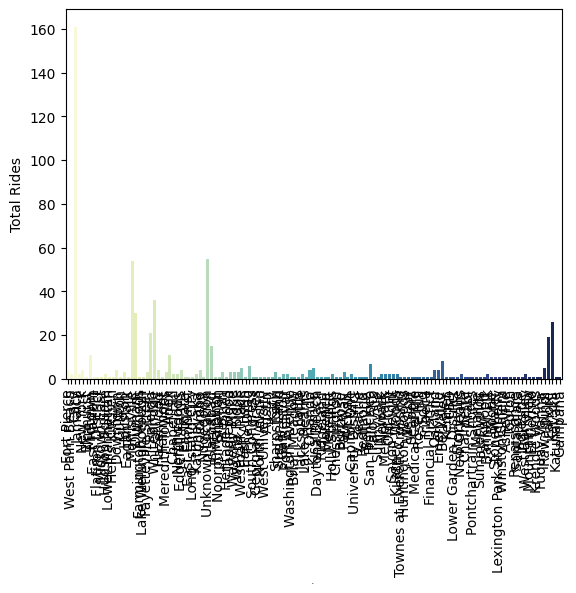

In [14]:
plot = sns.countplot(data=travel, x='Start City', palette = "YlGnBu")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_ylabel("Total Rides")
plot.set_xlabel("City", fontsize=1)

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/2026340904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=travel, x='Start City', order=travel['Stop City'].value_counts().iloc[:10].index, palette = "YlGnBu")
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/2026340904.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Total Rides')

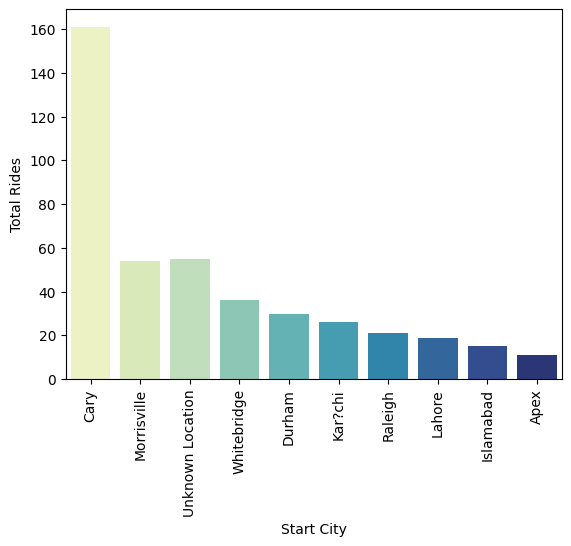

In [15]:
plot = sns.countplot(data=travel, x='Start City', order=travel['Stop City'].value_counts().iloc[:10].index, palette = "YlGnBu")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_ylabel("Total Rides")

# Visualize the total miles per week day

In [16]:
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,January


/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/3903844364.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Saturday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Sunday'),
 Text(6, 0, 'Monday')]

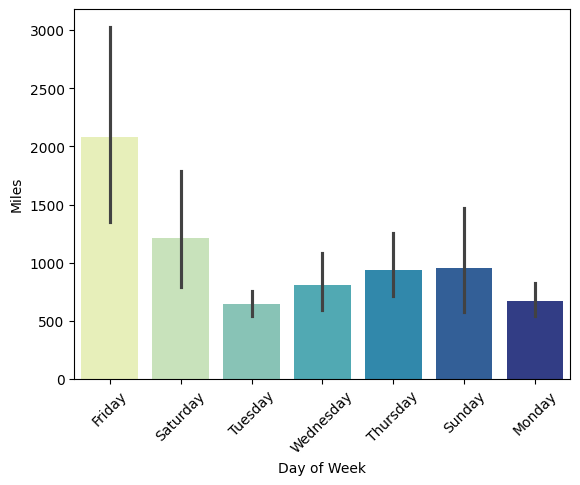

In [17]:
plot = sns.barplot(x='Day of Week', y='Miles', data=travel, hue='Day of Week', palette='YlGnBu', estimator=sum)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Visualize the total rides per hour

### Create hour column

In [18]:
travel['Start Date'] = pd.to_datetime(travel['Start Date'])
travel['Hour'] = travel['Start Date'].dt.hour
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week,Month,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,21
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,14
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,January,17


/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/326370498.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=travel, x='Hour', palette = set_custom_palette(travel['Hour']))


Text(0, 0.5, 'Total Rides')

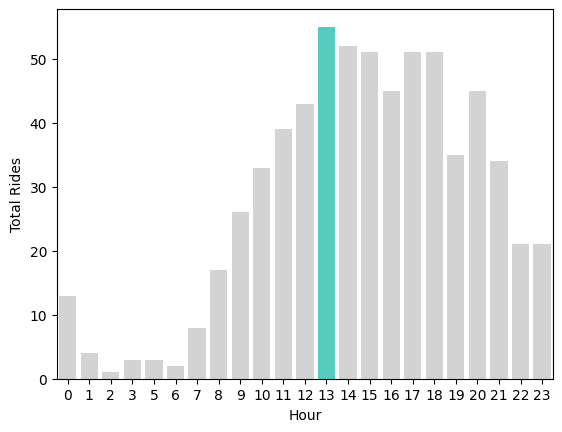

In [30]:
def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    hours = sorted(series.unique())
    pal = []
    
    for item in hours:
        if item == 13:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal
    
plot = sns.countplot(data=travel, x='Hour', palette = set_custom_palette(travel['Hour']))
plot.set_ylabel('Total Rides')


### Visualize the top 10 Stop locations

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/3070726321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Stop City", data=travel, order=travel['Stop City'].value_counts().iloc[:10].index, palette="YlGnBu")
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/3070726321.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


Text(0, 0.5, 'Total Rides')

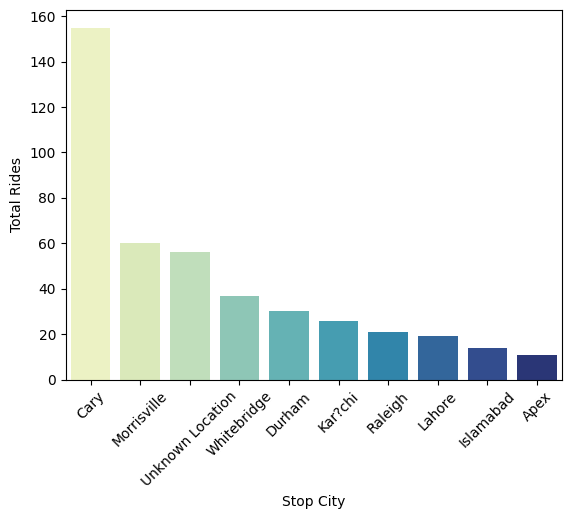

In [20]:
plot = sns.countplot(x="Stop City", data=travel, order=travel['Stop City'].value_counts().iloc[:10].index, palette="YlGnBu")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_ylabel("Total Rides")

### In which month, was the most number of miles driven?

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1308088251.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'October'),
 Text(9, 0, 'November'),
 Text(10, 0, 'December')]

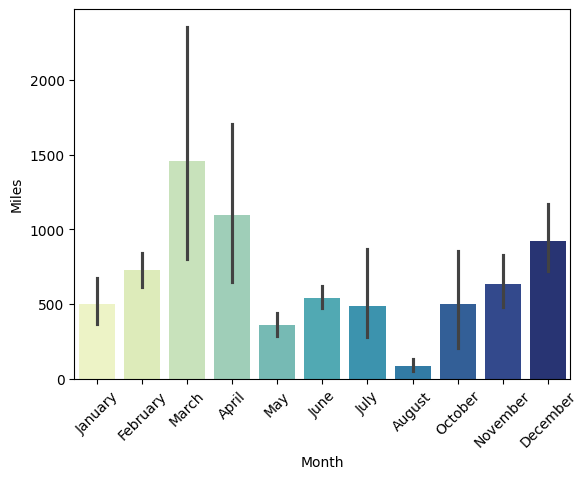

In [21]:
plot = sns.barplot(x="Month", y='Miles', data=travel, hue="Month", palette='YlGnBu', estimator = sum)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

##### The most number of miles was driven in March

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/758086956.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Purpose", data=travel, order=travel['Purpose'].value_counts().iloc[:10].index, palette="YlGnBu")
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/758086956.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/758086956.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  travel['Purpose'].value_count

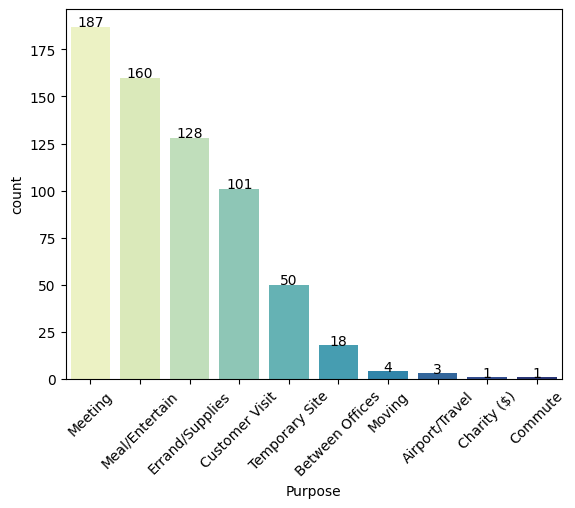

In [22]:
plot = sns.countplot(x="Purpose", data=travel, order=travel['Purpose'].value_counts().iloc[:10].index, palette="YlGnBu")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
i=0
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x()+p.get_width()/2., height + 0.1,
        travel['Purpose'].value_counts()[i],ha="center")
    i += 1

### On which purpose was the most number of travels?

##### The most number of travels was for the purpose of a Meeting

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/4115113191.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Meal/Entertain'),
 Text(1, 0, 'Errand/Supplies'),
 Text(2, 0, 'Meeting'),
 Text(3, 0, 'Customer Visit'),
 Text(4, 0, 'Temporary Site'),
 Text(5, 0, 'Between Offices'),
 Text(6, 0, 'Charity ($)'),
 Text(7, 0, 'Commute'),
 Text(8, 0, 'Moving'),
 Text(9, 0, 'Airport/Travel')]

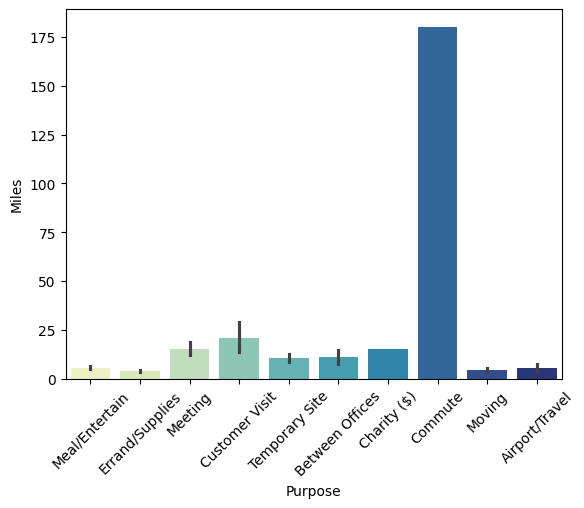

In [23]:
plot = sns.barplot(x='Purpose', y='Miles', data=travel, hue='Purpose', palette='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45) 

##### The most number of miles driven was for the purpose of commute

<Axes: xlabel='Category', ylabel='Miles'>

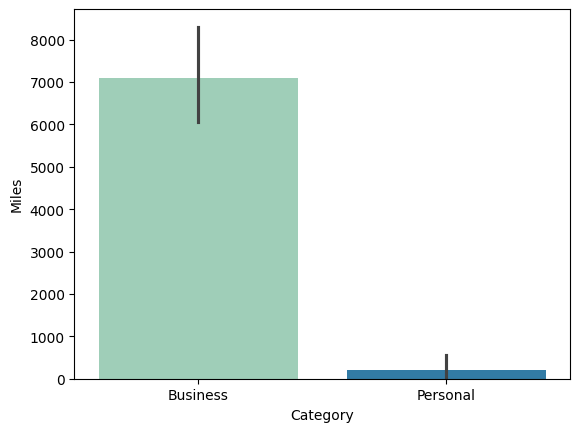

In [24]:
sns.barplot(x="Category", y='Miles', data=travel, hue="Category", estimator = sum, palette="YlGnBu")

##### What is the most common destination?

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1045358497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Stop City', data=travel, order=travel['Stop City'].value_counts().iloc[:10].index, palette='YlGnBu')
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/1045358497.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Cary'),
 Text(1, 0, 'Morrisville'),
 Text(2, 0, 'Unknown Location'),
 Text(3, 0, 'Whitebridge'),
 Text(4, 0, 'Durham'),
 Text(5, 0, 'Kar?chi'),
 Text(6, 0, 'Raleigh'),
 Text(7, 0, 'Lahore'),
 Text(8, 0, 'Islamabad'),
 Text(9, 0, 'Apex')]

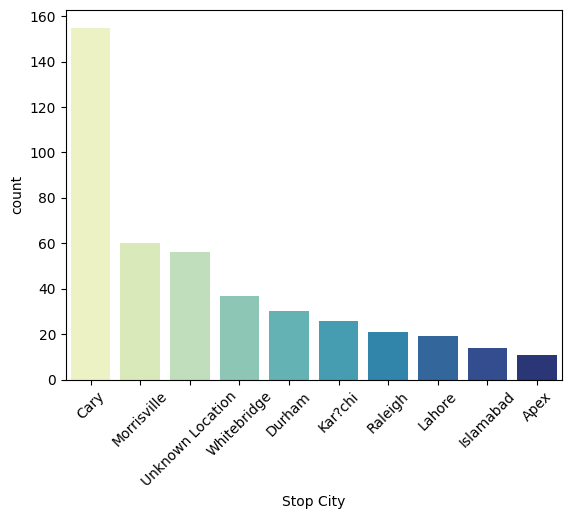

In [25]:
plot = sns.countplot(x='Stop City', data=travel, order=travel['Stop City'].value_counts().iloc[:10].index, palette='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

##### The most common destination is Cary

/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/2474904684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=travel, palette=colors)
/var/folders/cg/516fb9rx0hn78fy28mdjy1_00000gn/T/ipykernel_79268/2474904684.py:4: UserWarning: The palette list has more values (653) than needed (23), which may not be intended.
  sns.countplot(x="Hour", data=travel, palette=colors)


310.3


<Axes: xlabel='Hour', ylabel='count'>

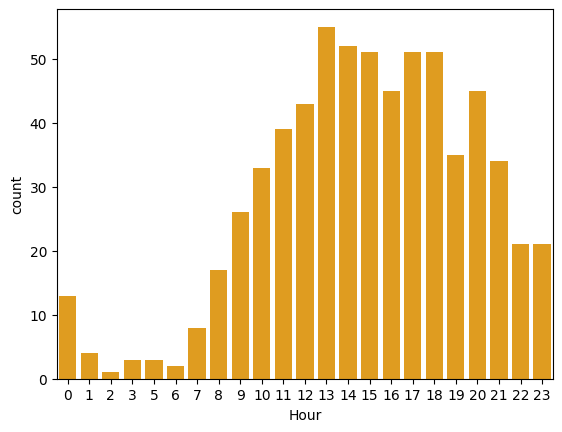

In [26]:
miles = np.array(travel.Miles)
colors = ['orange' if (x < max(miles)) else 'green' for x in miles]
print(max(miles))
sns.countplot(x="Hour", data=travel, palette=colors)

##### The most number of travels is at hour 13. Around the afternoon is where there is the most number of travelers

### Visualize the total rides per day in the month of February (bar graph)

#### Create date column

In [27]:
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week,Month,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,21
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,14
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,January,17


In [28]:
travel['Date'] = travel['Start Date'].dt.date
travel.head()

,Start Date,End Date,Category,Start City,Stop City,Miles,Purpose,Day of Week,Month,Hour,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,21,2016-01-01
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,20,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,17,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,14,2016-01-06
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,January,17,2016-01-06


#### Create new dataframe with only February

In [29]:
feb_travel = travel.loc[(travel['Month'] == 'February')]
feb_travel['Day'] == feb_travel['Date'].dt.day
feb_travel.head()

KeyError: 'Day'

In [ ]:
plot = sns.countplot(x='Day', data=feb_travel, palette='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_ylabel("Total Rides")
plot.set_xlabel("Day")

### Visualize the total miles per day in the month of November (line graph)

In [ ]:
nov_travel = travel.loc[(travel['Month'] == "November")]
nov_travel.head()

In [ ]:
plot = sns.barplot(x="Date", y="Miles", data=nov_travel, palette="YlGnBu", estimator = sum)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

### Visualize the total miles per month (pie chart)

In [ ]:
colors = sns.color_palette("tab10")
group_month = travel.groupby(['Month'], sort=False)['Miles'].sum()
print(group_month)

In [ ]:
group_month_list = group_month.to_list()
print(group_month_list)

In [ ]:
month_list = travel['Month'].unique()
print(month_list)

In [ ]:
plt.pie(group_month_list, labels=month_list, colors=colors, autopct='%.0f%%') 

### Visualize the total Monday rides in the month of August (bar graph)

#### Create dataframe with only August and Monday rides

In [ ]:
aug_travel = travel.loc[(travel['Month'] == 'August')]
aug_travel_mon = aug_travel.loc[(aug_travel['Day of Week'] == 'Monday')]
aug_travel_mon.loc[-1] = ['2016-08-01', '2016-08-01', None, None, None, None, None, 'Monday', 'August', None, '2016-08-01', 1]
aug_travel_mon['Date'] = aug_travel_mon['Date'] = 
aug_travel_mon.head()

In [ ]:
aug_mondays = ['2016-08-01', '2016-08-08', '2016-08-15', '2016-08-29']
aug_mon_count = [0, 2, 1, 1]
plot = sns.barplot(x=aug_mondays, y = aug_mon_count, palette="YlGnBu")
plot.set_ylabel("Total Rides")

### Visualize the average of miles per Saturday in the month of July per Cary city (line graph)

### Create dataframe with only Saturday, July, Cary Rides

In [ ]:
jul_travel = travel.loc[(travel['Month'] == 'July')]
jul_sat_travel = jul_travel.loc[(jul_travel['Day of Week'] == 'Saturday')]
jul_cary = jul_sat_travel.loc[(jul_sat_travel['Start City'] == 'Cary')]
jul_cary.head()

In [ ]:
sns.lineplot(x="Date", y="Miles", hue="Start City", ci='sd', estimator = "mean", data=jul_cary)

### Visualize the average monday rides vs tuesday rides (line graph)

#### Create dataframe with only monday and tuesday rides

In [ ]:
mon_tues = travel.loc[(travel['Day of Week'] == "Monday") | (travel['Day of Week'] == "Tuesday")]
mon_tues.head()

In [ ]:
sns.lineplot(x="Date", y="Miles", hue="Day of Week", estimator = "mean", data=mon_tues, palette = "YlGnBu")

### Visualize the average miles per start city

In [ ]:
plot = sns.barplot(x="Start City", y="Miles", data=travel, hue="Start City", palette="YlGnBu")
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

### Visualize purpose vs mile by Category(Stacked Bar)

In [ ]:
travel.head()

#### Create dataframe with only Purpose, Mile, and Category

In [ ]:
new_travel = travel[['Category', 'Miles', 'Purpose']].copy()
new_travel.head()
index = new_travel['Category'].unique()
print(index)

### Determine the standard deviation based on the trend line of the number of miles per hour on November 24th

In [ ]:
plot = sns.histplot(travel, x="Purpose", hue="Category", weights = "Miles", multiple="stack")
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)

#### Determine the standard deviation based on the trend line of the number of miles per hour on November 24th

In [ ]:
sns.regplot(data=travel, x='Hour', y='Miles')

In [ ]:
travel.head()

#### Create dataframe with only november 26 rides

In [ ]:
travel['Date'] = pd.to_datetime(travel['Date'])
travel['Day'] = travel['Date'].dt.day
travel.head()

In [ ]:
travel_nov_26 = travel.loc[(travel['Month'] == 'November') & (travel['Day'] == 26)]
travel_nov_26.head()

In [ ]:
import scipy as sp

In [ ]:
plot = sns.lmplot(data=travel_nov_26, x='Hour', y='Miles')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Hour'], data['Miles'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

plot.map_dataframe(annotate)
plt.show()